# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

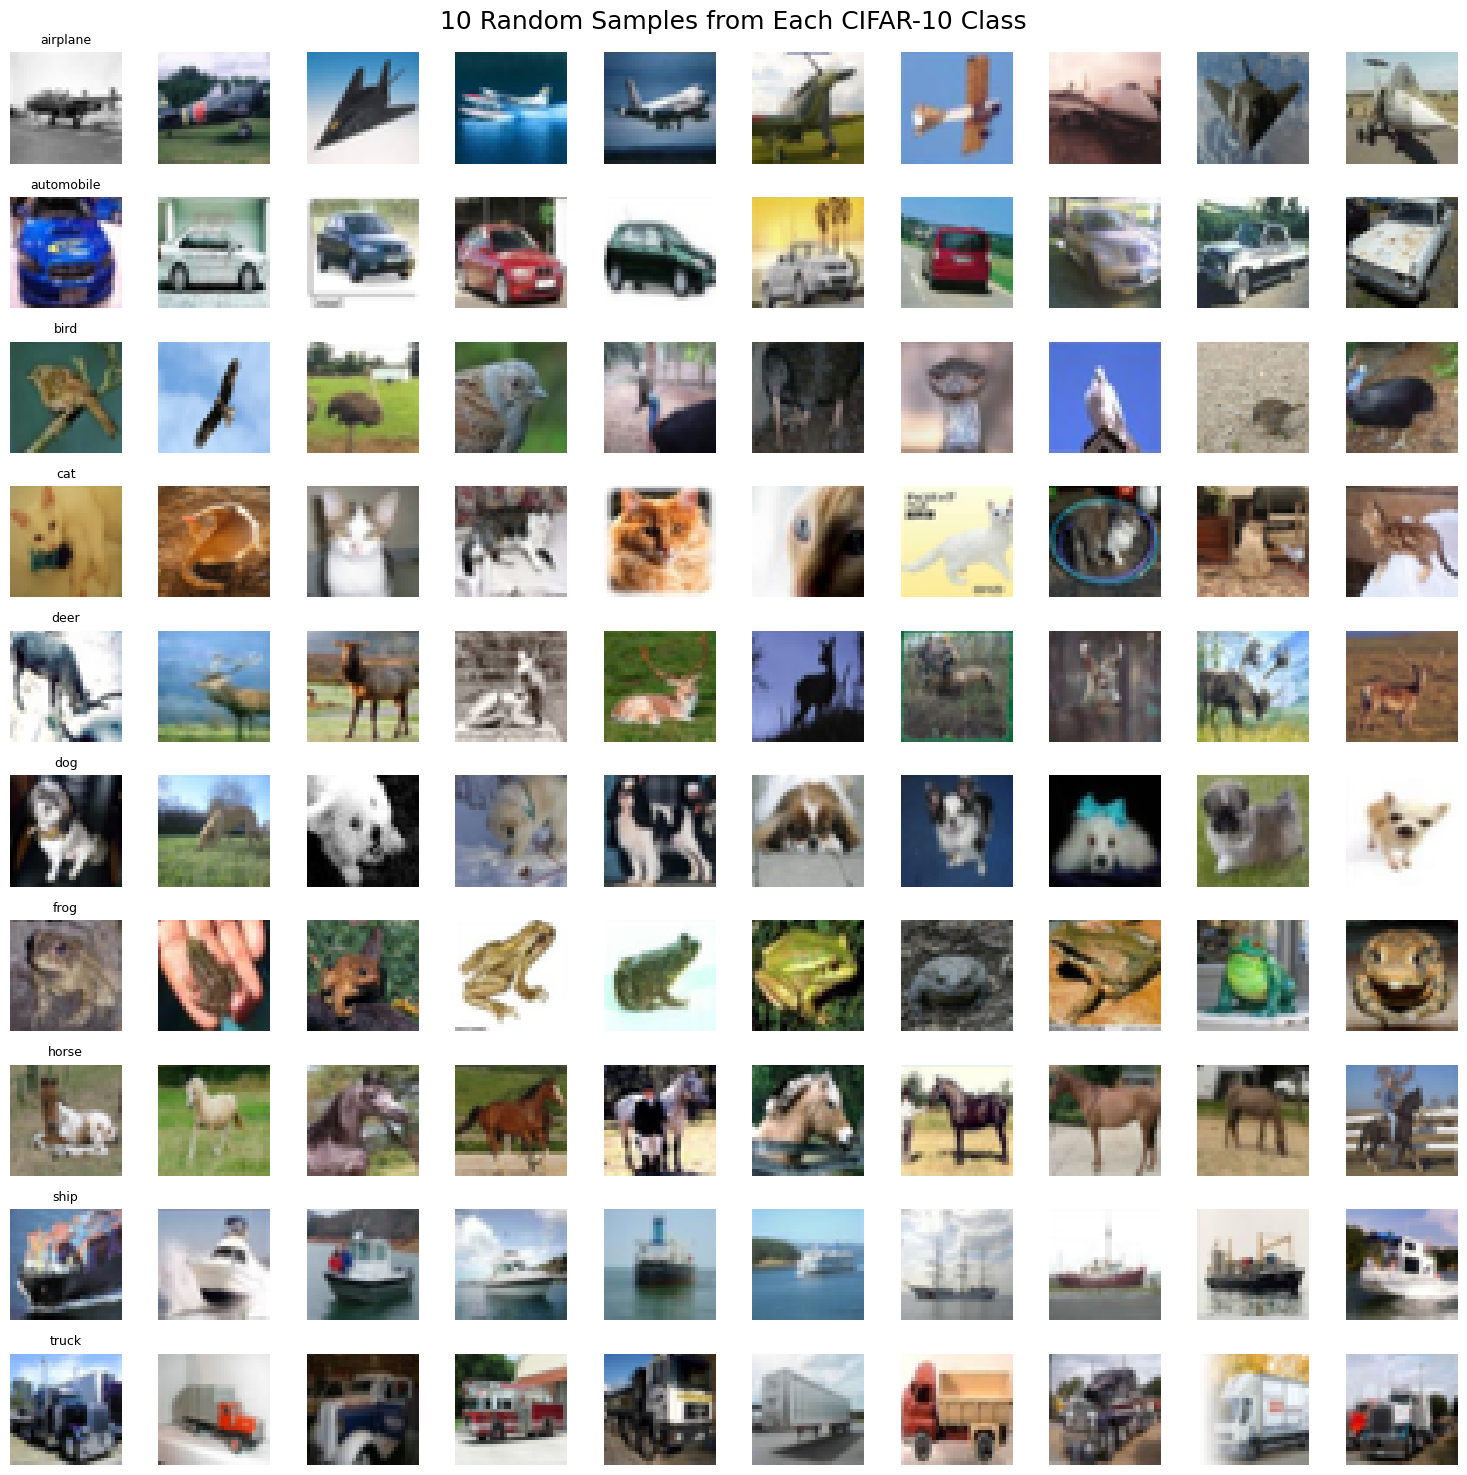

In [4]:
# 1. Visualize the images: 10 x 10 plot with 10 samples per class
# -------------------------------
plt.figure(figsize=(15, 15))
np.random.seed(42)  # For reproducibility

for class_idx in range(10):
    # Find all indices for this class
    class_indices = np.where(y_train == class_idx)[0]
    # Randomly choose 10 indices from this class
    sample_indices = np.random.choice(class_indices, 10, replace=False)

    for i, idx in enumerate(sample_indices):
        plt.subplot(10, 10, class_idx * 10 + i + 1)
        plt.imshow(x_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(class_names[class_idx], fontsize=9)

plt.suptitle('10 Random Samples from Each CIFAR-10 Class', fontsize=18)
plt.tight_layout()
plt.show()

In [5]:
num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

print("✅ One-hot encoding complete!")
print(f"Original y_train shape: {y_train.shape}")
print(f"One-hot y_train shape: {y_train_one_hot.shape}")
print(f"Sample original label: {y_train[0]}")
print(f"Sample one-hot label: {y_train_one_hot[0]}")


✅ One-hot encoding complete!
Original y_train shape: (50000, 1)
One-hot y_train shape: (50000, 10)
Sample original label: [6]
Sample one-hot label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
# 3. Normalize the image pixel values to [0, 1]
# -------------------------------
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

print("\n✅ Image normalization complete!")
print(f"Normalized x_train min/max: {x_train.min()}/{x_train.max()}")


✅ Image normalization complete!
Normalized x_train min/max: 0.0/1.0


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [7]:
from keras.backend import clear_session
clear_session()

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import SGD

# Define constants
input_shape = (32, 32, 3)
num_classes = 10

# Build the model
model = Sequential([
    Input(shape=input_shape),  # Explicit input layer
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(num_classes, activation='softmax')  # Classification layer
])

# Show model architecture
model.summary()

# Compile the model
model.compile(
    optimizer=SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n✅ Model compilation complete!")
print("Optimizer: SGD")
print("Loss: Categorical Crossentropy")
print("Metrics: Accuracy")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)


✅ Model compilation complete!
Optimizer: SGD
Loss: Categorical Crossentropy
Metrics: Accuracy


In [11]:
history = model.fit(x_train_normalized, y_train_one_hot,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test_normalized, y_test_one_hot))  # Optional: use test data for validation



Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1134 - loss: 2.3025

KeyboardInterrupt: 

*   Plot the cross entropy loss curve and the accuracy curve

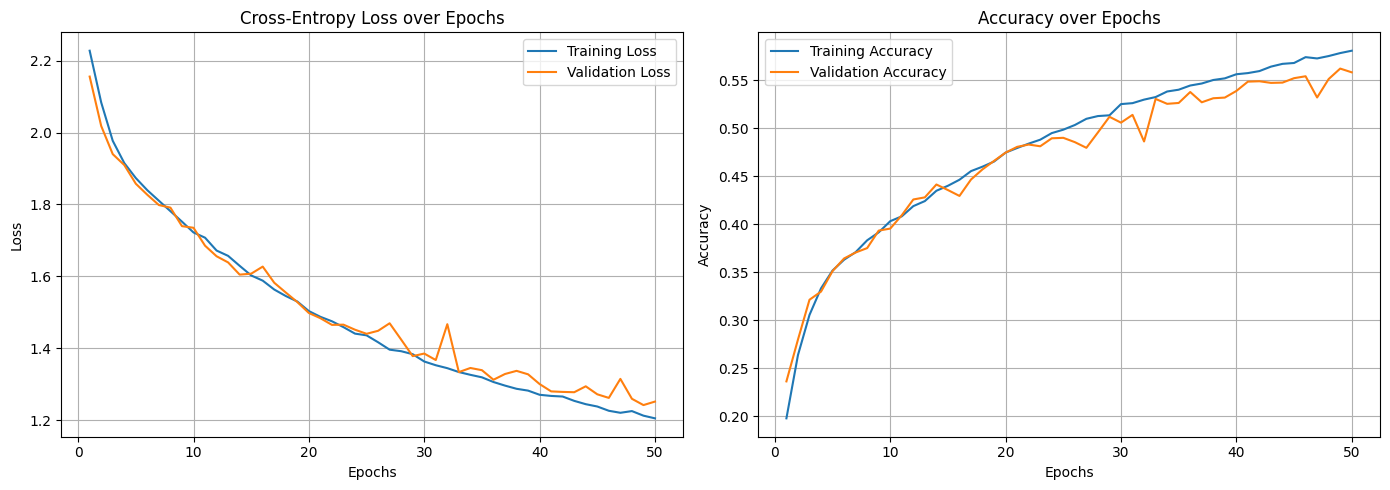

In [ ]:
import matplotlib.pyplot as plt

# Extract data
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Cross-Entropy Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input # Input is good practice, though not strictly needed for Sequential's first layer
# We don't need Dropout for this specific VGG-like description, but keep it if you plan to add it later.

# Define common parameters for CIFAR-10
input_shape = (32, 32, 3)
num_classes = 10

# Initialize the Sequential model
model_vgg = Sequential() # Using 'model_vgg' to distinguish from previous 'model'

print("Necessary Keras layers imported and Sequential model initialized as 'model_vgg'.")


Necessary Keras layers imported and Sequential model initialized as 'model_vgg'.


In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Define common parameters
input_shape = (32, 32, 3)
num_classes = 10

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images to [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Build the VGG-like model
model_vgg = Sequential()

# First Convolutional Block: two Conv2D layers with 32 filters and 'same' padding
model_vgg.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model_vgg.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))  # Downsampling

# Flatten the output
model_vgg.add(Flatten())

# Fully connected layer
model_vgg.add(Dense(128, activation='relu'))

# Output layer for classification
model_vgg.add(Dense(num_classes, activation='softmax'))

# Show model summary
model_vgg.summary()

# Compile the model
model_vgg.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("✅ VGG-like model successfully compiled!")
print("Optimizer: SGD")
print("Loss Function: Categorical Crossentropy")
print("Metrics: Accuracy")

# Train the model
history_vgg = model_vgg.fit(
    x_train_normalized, y_train_one_hot,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_one_hot)
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

✅ VGG-like model successfully compiled!
Optimizer: SGD
Loss Function: Categorical Crossentropy
Metrics: Accuracy
Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.1329 - loss: 2.2881 - val_accuracy: 0.2062 - val_loss: 2.2106
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.2307 - loss: 2.1635 - val_accuracy: 0.2761 - val_loss: 2.0086
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2872 - loss: 1.9967 - val_accuracy: 0.2920 - val_loss: 1.9920
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3148 - loss: 1.9305 - val_accuracy: 0.3180 - val_loss: 1.8930
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3388 - loss: 1.8696 - val_accuracy: 0.3434 - val_loss: 1.8589
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3508 - loss: 1.8345 - val_accuracy: 0.3678 - val_loss: 1.7959
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3706 - loss: 1.7879 - val_accuracy: 0.3799 - val_loss: 1.7

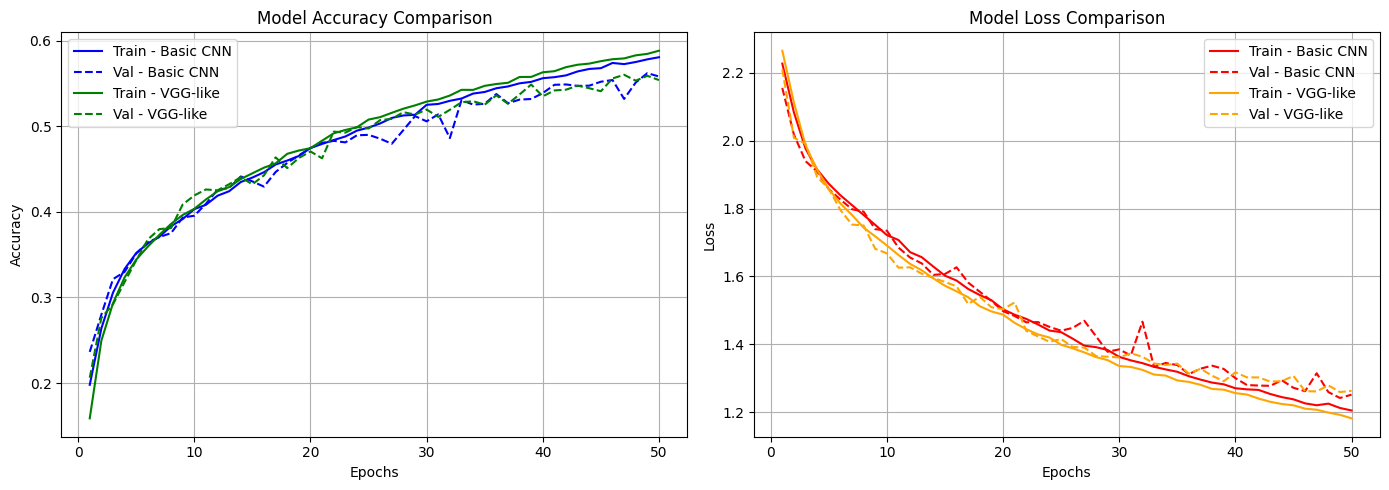

In [ ]:
import matplotlib.pyplot as plt

# Extract values from both histories
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

acc_vgg = history_vgg.history['accuracy']
val_acc_vgg = history_vgg.history['val_accuracy']
loss_vgg = history_vgg.history['loss']
val_loss_vgg = history_vgg.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy Comparison
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Train - Basic CNN')
plt.plot(epochs, val_acc, 'b--', label='Val - Basic CNN')
plt.plot(epochs, acc_vgg, 'g-', label='Train - VGG-like')
plt.plot(epochs, val_acc_vgg, 'g--', label='Val - VGG-like')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r-', label='Train - Basic CNN')
plt.plot(epochs, val_loss, 'r--', label='Val - Basic CNN')
plt.plot(epochs, loss_vgg, 'orange', label='Train - VGG-like')
plt.plot(epochs, val_loss_vgg, 'orange', linestyle='--', label='Val - VGG-like')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


**Comment on the observation**

Based on the plots, the deeper VGG-like model appears to perform better than the Basic CNN. It achieves slightly higher accuracy and consistently lower and more stable loss on both the training and validation sets, suggesting better learning and generalization capabilities.

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
import numpy as np

# Use the trained VGG-like model to predict class probabilities for test data
predictions = model_vgg.predict(x_test_normalized)

print("✅ Predictions generated.")
print(f"Shape of predictions: {predictions.shape}")
print(f"First 5 predictions (probability distributions):\n{predictions[:5]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
✅ Predictions generated.
Shape of predictions: (10000, 10)
First 5 predictions (probability distributions):
[[2.2635221e-02 6.1423983e-03 6.4018883e-02 5.2374732e-01 3.1988602e-02
  2.7811980e-01 2.2466663e-02 1.3022189e-03 4.2889331e-02 6.6894842e-03]
 [5.7313062e-02 7.0571679e-01 2.1597526e-04 8.7350898e-05 1.8173347e-04
  1.3669153e-05 1.8113878e-04 6.8099284e-06 1.7405134e-01 6.2232263e-02]
 [4.4418314e-01 3.0714792e-01 3.8859583e-03 4.1936543e-03 4.9839388e-03
  1.8586207e-03 2.8283920e-04 4.0542404e-03 1.2443525e-01 1.0497448e-01]
 [4.5019820e-01 1.4302431e-01 4.6630297e-02 4.8959861e-03 3.5510957e-02
  1.1649883e-03 2.7232300e-04 1.3372691e-02 2.7047294e-01 3.4457285e-02]
 [7.3164432e-05 2.3669585e-04 2.4744753e-02 2.6772369e-02 8.3995754e-01
  1.3207961e-02 8.8789962e-02 5.2273204e-03 7.4173859e-04 2.4851353e-04]]


In [ ]:
# Convert predicted probabilities to class labels (0-9)
predicted_classes = np.argmax(predictions, axis=1)

# Flatten true labels if needed (y_test is assumed to be in shape (10000, 1))
true_classes = y_test.flatten()

print(f"\n🎯 First 5 predicted class labels: {predicted_classes[:5]}")
print(f"✅ Corresponding true labels: {true_classes[:5]}")


🎯 First 5 predicted class labels: [3 1 0 0 4]
✅ Corresponding true labels: [3 8 8 0 6]


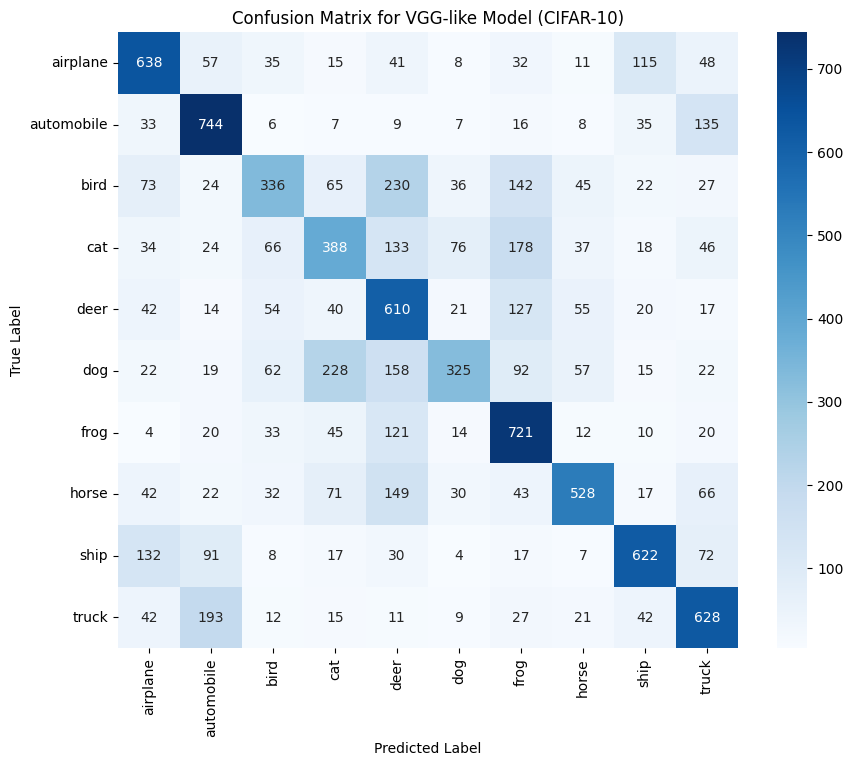

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for VGG-like Model (CIFAR-10)')
plt.show()



**Comment here :**

strengths in classifying certain objects that are different between them, but animals like cat, dog, deer, horse is doing very poor!

*    Print the test accuracy for the trained model.

In [ ]:
# Evaluate the model on the normalized test data with one-hot encoded labels
loss, accuracy = model_vgg.evaluate(x_test_normalized, y_test_one_hot, verbose=0)

print(f"\n🧪 Test Loss: {loss:.4f}")
print(f"🎯 Test Accuracy: {accuracy:.4f}")


🧪 Test Loss: 1.2630
🎯 Test Accuracy: 0.5540


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Define input shape and number of classes for CIFAR-10
input_shape_new = (64, 64, 3)
num_classes = 10

# Initialize the Sequential model
model_deeper_vgg = Sequential()

print(f"Necessary Keras layers imported. New input shape defined as {input_shape_new}.")
print("Sequential model initialized as 'model_deeper_vgg'.")

# --- Block 1: Two Conv2D layers with 64 filters, 3x3 kernel + MaxPooling ---
model_deeper_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape_new))
model_deeper_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_deeper_vgg.add(MaxPooling2D(pool_size=(2, 2)))

# --- Block 2: Two Conv2D layers with 128 filters, 3x3 kernel + MaxPooling ---
model_deeper_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_deeper_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_deeper_vgg.add(MaxPooling2D(pool_size=(2, 2)))

# --- Block 3: Two Conv2D layers with 256 filters, 3x3 kernel + MaxPooling ---
model_deeper_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_deeper_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_deeper_vgg.add(MaxPooling2D(pool_size=(2, 2)))

print("All convolutional blocks and max pooling layers added to 'model_deeper_vgg'.")

# Flatten the output of convolutional blocks
model_deeper_vgg.add(Flatten())

# Dense layer with 128 units + ReLU activation
model_deeper_vgg.add(Dense(128, activation='relu'))

# Output layer with softmax activation for classification
model_deeper_vgg.add(Dense(num_classes, activation='softmax'))

# Display the model architecture summary
model_deeper_vgg.summary()

print("Flatten, Dense (128 units), and output Dense layers added to 'model_deeper_vgg'.")
print("Model summary displayed for the new deeper VGG-like architecture.")

Necessary Keras layers imported. New input shape defined as (64, 64, 3).
Sequential model initialized as 'model_deeper_vgg'.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


All convolutional blocks and max pooling layers added to 'model_deeper_vgg'.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

Flatten, Dense (128 units), and output Dense layers added to 'model_deeper_vgg'.
Model summary displayed for the new deeper VGG-like architecture.


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# Compile the new deeper VGG-like model
model_deeper_vgg.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("New deeper VGG-like model compilation complete!")
print("Optimizer: SGD")
print("Loss Function: Categorical Crossentropy")
print("Metrics: Accuracy")

New deeper VGG-like model compilation complete!
Optimizer: SGD
Loss Function: Categorical Crossentropy
Metrics: Accuracy


In [ ]:
import tensorflow as tf

print("Resizing training and test images to 64x64 pixels...")
x_train_resized = tf.image.resize(x_train_normalized, (64, 64)).numpy()
x_test_resized = tf.image.resize(x_test_normalized, (64, 64)).numpy()

print(f"Resized x_train shape: {x_train_resized.shape}")
print(f"Resized x_test shape: {x_test_resized.shape}")
print("Image resizing complete.")

Resizing training and test images to 64x64 pixels...
Resized x_train shape: (50000, 64, 64, 3)
Resized x_test shape: (10000, 64, 64, 3)
Image resizing complete.


In [ ]:
# Train the model on resized images

history_deeper_vgg = model_deeper_vgg.fit(
    x_train_resized, y_train_one_hot,
    epochs=10,
    batch_size=512,
    validation_data=(x_test_resized, y_test_one_hot),
    verbose=1
)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.1057 - loss: 2.3022 - val_accuracy: 0.1837 - val_loss: 2.2978
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 376ms/step - accuracy: 0.1880 - loss: 2.2959 - val_accuracy: 0.1856 - val_loss: 2.2856
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 381ms/step - accuracy: 0.1897 - loss: 2.2762 - val_accuracy: 0.2361 - val_loss: 2.2096
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 381ms/step - accuracy: 0.2195 - loss: 2.1713 - val_accuracy: 0.2693 - val_loss: 2.0570
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 387ms/step - accuracy: 0.2676 - loss: 2.0598 - val_accuracy: 0.3192 - val_loss: 1.9415
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 385ms/step - accuracy: 0.2984 - loss: 1.9732 - val_accuracy: 0.3262 - val_loss: 1.8788
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 385ms/step - accuracy: 0.3213 - loss: 1.9064 - val_accuracy: 0.3264 - val_loss: 1.9077
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 390ms/step - accuracy: 0.3432 - loss: 1.8446 - val_accura

Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step


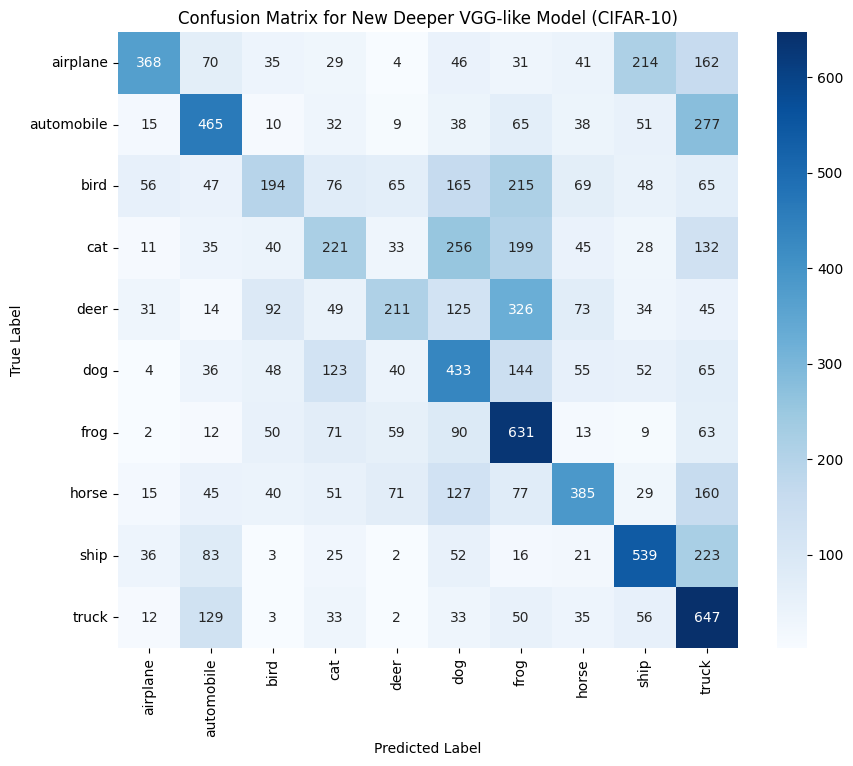

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict probabilities on test set (64x64 resized images)
predictions = model_deeper_vgg.predict(x_test_resized)

# Get predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# True class labels (flatten y_test if needed)
true_classes = y_test.flatten()

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for New Deeper VGG-like Model (CIFAR-10)')
plt.show()

This confusion matrix shows how a "New Deeper VGG-like Model" performed on the CIFAR-10 image dataset.

The main diagonal numbers (e.g., 631 for frog, 647 for truck) indicate correct predictions, showing the model is quite good at identifying these objects. Off-diagonal numbers reveal misclassifications, like birds being mistaken for deer or dogs, and cats for dogs or frogs, highlighting where the model struggles to differentiate visually similar classes.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity into the neural network. Without them, the network would behave like a simple linear model, no matter how many layers it has. Non-linearity allows the network to learn and represent complex patterns and decision boundaries in data.



_

2 - Key Differences between sigmoid and softmax:

Sigmoid outputs a value between 0 and 1 for each input independently. It’s often used for binary classification or multilabel problems (each output can be true or false independently).

Softmax outputs a probability distribution across multiple classes — all output values sum to 1. It’s used for multi-class classification where only one class is correct.



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary crossentropy is used for binary classification tasks (two classes). It measures the difference between predicted probabilities and true binary labels.

Categorical crossentropy is used for multi-class classification problems (more than two classes). It compares the predicted probability distribution over classes with the true class label (usually one-hot encoded).
_
